<a href="https://colab.research.google.com/github/Guildguy/42LIbft/blob/master/Beginner01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import files
uploaded = files.upload()

Saving Beginner01.ipynb to Beginner01.ipynb


In [73]:
#This time pandas is forbidden, you have to use only numpy
import numpy as np

In [105]:
# Read the data from the CSV file with read from Numpy
# Scientific notation
data = np.loadtxt("Salary_dataset.csv", delimiter=',', skiprows=1, usecols=(1,2))
np.set_printoptions(suppress=True)

print(f"     Years / Salary\n{data}")

     Years / Salary
[[     1.2  39344. ]
 [     1.4  46206. ]
 [     1.6  37732. ]
 [     2.1  43526. ]
 [     2.3  39892. ]
 [     3.   56643. ]
 [     3.1  60151. ]
 [     3.3  54446. ]
 [     3.3  64446. ]
 [     3.8  57190. ]
 [     4.   63219. ]
 [     4.1  55795. ]
 [     4.1  56958. ]
 [     4.2  57082. ]
 [     4.6  61112. ]
 [     5.   67939. ]
 [     5.2  66030. ]
 [     5.4  83089. ]
 [     6.   81364. ]
 [     6.1  93941. ]
 [     6.9  91739. ]
 [     7.2  98274. ]
 [     8.  101303. ]
 [     8.3 113813. ]
 [     8.8 109432. ]
 [     9.1 105583. ]
 [     9.6 116970. ]
 [     9.7 112636. ]
 [    10.4 122392. ]
 [    10.6 121873. ]]


In [75]:
# Separate the features (YearsExperience) from the target variable (Salary)
X = data[:, 0]
y = data[:, 1]

print(f"Years: {X}\nSalary: {y}")

Years: [ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6]
Salary: [ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


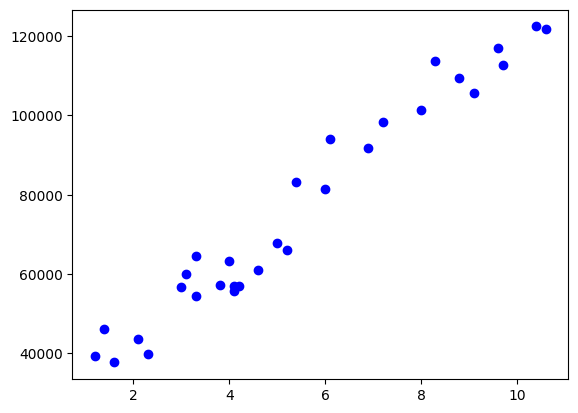

In [90]:
#This time seaborn is forbidden, you have to find a library that works with numpy
import matplotlib.pyplot as plt

#You have to reproduce this graph
plt.plot(X, y, 'bo')
plt.show()

In [77]:
# Let's create a function that displays the point line with the bar.
def visualize(theta, X, y):
  plt.figure()
  y_pred =   + theta[1] * X
  plt.plot(X, y, 'bo', X, y_pred, 'r-')

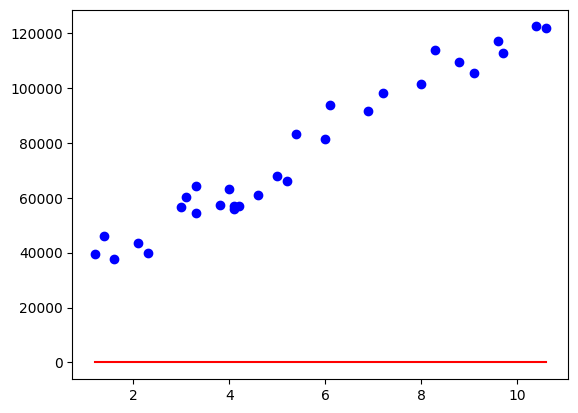

In [78]:
# Ok, let's test our function now, you should get a result comparable to this one

theta = np.zeros(2)
visualize(theta, X, y)

In [79]:
# Create a function that multiplies each element of the matrix X by the slope of the model (theta[1]),
#followed by the addition of the intercept of the model (theta[0]), thus producing the predictions of the simple linear regression model.

def predict(X, theta):
    # Assuming theta is a 1D array [intercept, slope]
    return (theta[0] + theta[1] * X)

In [106]:
def fit(X, y, theta, alpha, num_iters):
    # Initialize some useful variables
    # Returns the first item in a tuple , is a 1D arr, so, its the total number of itens
    m = X.shape[0]
    # Loop over the number of iterations
    for _ in range(num_iters):
        # Calculate the predictions using the current theta values
        errors = predict(X, theta) - y
        intercept = np.sum(errors) / m
        slope = np.sum(errors * X) / m

        theta[0] = theta[0] - alpha * intercept
        theta[1] = theta[1] - alpha * slope

    return (theta)

In [107]:
# To begin, we'll set alpha to 0.01 and num_iters to 1000

theta = np.zeros(2)
finetuned_theta = fit(X, y, theta, 0.01, 1000)
print(finetuned_theta)

#You should have a result similar to this one: [21912.58918422329, 9880.814004608217]

[21912.59  9880.81]


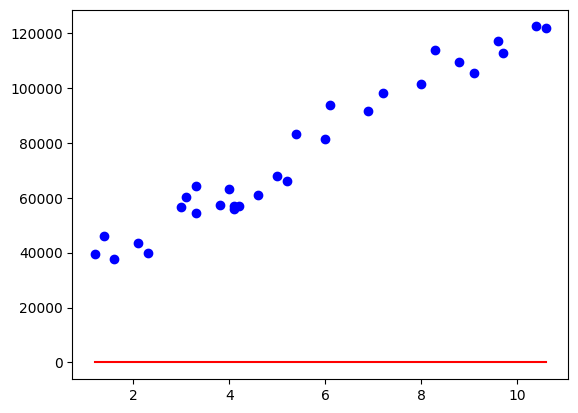

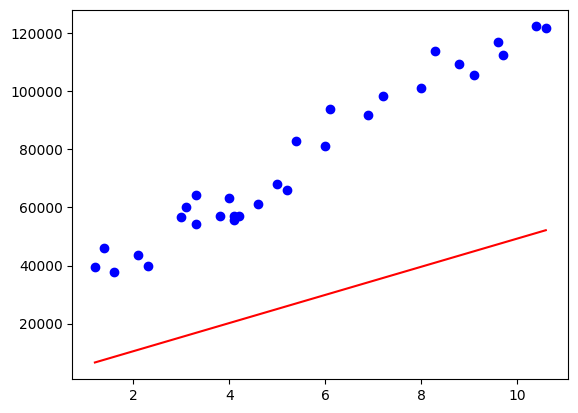

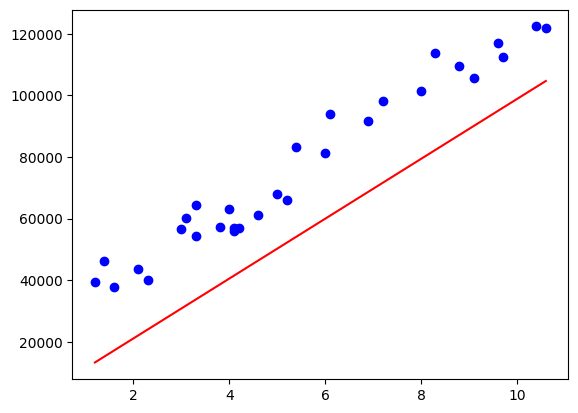

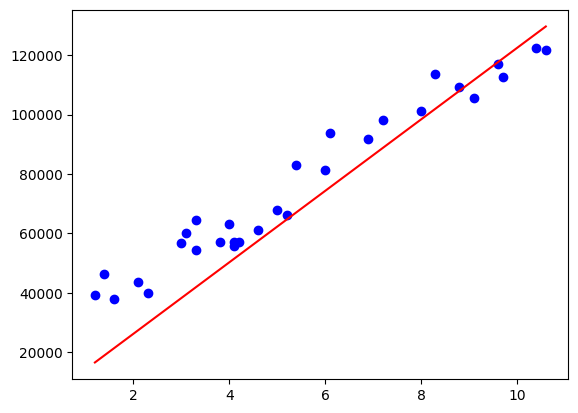

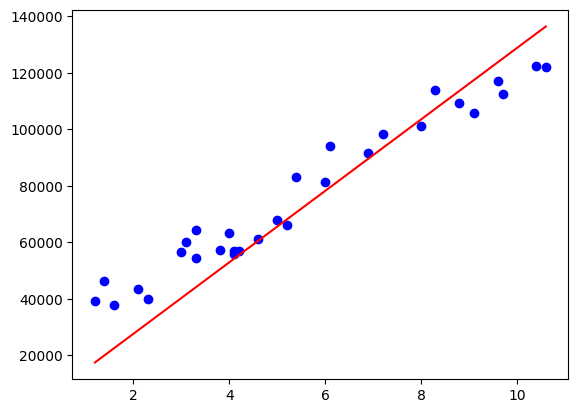

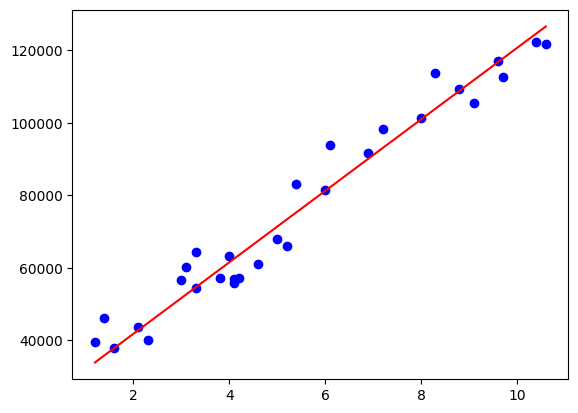

In [98]:
# Ok, let's test our function now, you should get a result comparable to this one
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 0), X, y)
visualize(fit(X, y, theta, 0.01, 1), X, y)
visualize(fit(X, y, theta, 0.01, 2), X, y)
visualize(fit(X, y, theta, 0.01, 3), X, y)
visualize(fit(X, y, theta, 0.01, 4), X, y)
visualize(fit(X, y, theta, 0.01, 1000), X, y)

In [99]:
def cost(X, y, theta):
    # Calculate the difference between model predictions and actual target values
    error = predict(X, theta) - y

    # Calculate the squared sum of the loss and scale it by 1/(2 * number of samples)
    cost = np.sum(error ** 2) / (2 * len(X))

    # Return the computed cost as a measure of model fit
    return (cost)


In [84]:
# Test it with theta = [0,0]. You should get approximately 3251553638.

cost_for_theta_zero = cost(X, y, [0, 0])
print(cost_for_theta_zero)

3251553638.866667


In [120]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]  # Number of training examples
    J_history = []  # List to store cost values at each iteration

    # Loop over the specified number of iterations
    for _ in range(num_iters):
        # Calculate the loss (difference between predictions and actual values)
        error = predict(X, theta) - y

        # Update the temporary values of theta for both coefficients using the gradient descent formula
        t_inter = theta[0] - (alpha / m) * np.sum(error)
        t_slope = theta[1] - (alpha / m) * np.sum(error * X)

        # Update the theta values
        theta[0] = t_inter
        theta[1] = t_slope

        # Calculate and append the cost for the current theta values to the history list
        J_history.append(cost(X, y, theta))

    # Return the final theta values and the list of cost values over iterations
    return (theta, J_history)

In [121]:
# First, we initialize theta to zero
theta = np.zeros(2)

# Start the training using your new function
theta, J_history = fit_with_cost(X, y, theta, 0.001, 100)


In [122]:
#You have to reproduce this graph

In [125]:
# Years of experience of the person you want to predict the salary for
years_experience = 10

# Predict the salary
predicted_salary = predict(years_experience, theta)

# Display the predicted salary
print(f"Predicted salary for {years_experience} years of experience {predicted_salary}")

Predicted salary for 10 years of experience 127134.91360616997
